In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np 
import pandas as pd

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
rows,cols = 28,28

In [4]:
x_train = x_train.reshape(x_train.shape[0],rows , cols, 1)
x_test = x_test.reshape(x_test.shape[0],rows , cols, 1)

In [5]:
input_shape = (rows, cols, 1)

In [6]:
#Normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
#one_hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test= tf.keras.utils.to_categorical(y_test,10)

In [8]:
def build_lenet(input_shape):
    #sequential API
    model = tf.keras.Sequential()
    #convolutional #1. Filters as we know, is 6. Filter size is 5 x 5, tanh is the activation function. 28 x 28 is the dimension.
    model.add(tf.keras.layers.Conv2D(filters = 6, 
                                     kernel_size=(5,5),
                                     strides=(1,1),
                                     activation='tanh', 
                                     input_shape= input_shape))
    
    #subsampling #1. Input = 24 x 24 x 6. Output = 12 x 12 x 6. Subsampling is simply Average pooling so we use avg_pool
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                               strides=(2,2)))
    
    #convolutional #2. Input = 12 x 12 x 6. Output = 8 x 8 x 16 conv2D  
    model.add(tf.keras.layers.Conv2D(filters = 16, 
                                     kernel_size=(5,5),
                                     strides=(1,1),
                                     activation='tanh'))
    
    #subsampling #2. Input = 8 x 8 x 16. Output = 4 x 4 x 16. Subsampling is simply Average pooling so we use avg_pool
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                               strides=(2,2)))
    
    
    
    
    #To convert all the resultant 2D arrays as single Long continuous Linear vector we are going to use flatten layer. 
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 120, activation = 'tanh'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 84, activation = 'tanh'))
    
    #output layer
    model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
    
    #Compile model
    model.compile(loss= 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(lr=0.1,momentum=0.0,decay=0.0),
                  metrics = ['accuracy'])
    return model 

In [9]:
#build lenet 
lenet = build_lenet(input_shape)
epochs = 10
history = lenet.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size= 128,
                   verbose = 1)
loss , acc = lenet.evaluate(x_test, y_test)
print('ACCURACY: ',acc)
x_train=x_train.reshape(x_train.shape[0],28,28)
print("Training Data", x_train.shape,y_train.shape)

x_test=x_test.reshape(x_test.shape[0],28,28)
print("Test Data", x_test.shape,y_test.shape)

Epoch 1/10


C:\Users\rajra\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 27s 57ms/step - loss: 0.4022 - accuracy: 0.8887
Epoch 2/10
469/469 [==============================] - 24s 51ms/step - loss: 0.1601 - accuracy: 0.9527
Epoch 3/10
469/469 [==============================] - 24s 51ms/step - loss: 0.1076 - accuracy: 0.9682
Epoch 4/10
469/469 [==============================] - 25s 52ms/step - loss: 0.0840 - accuracy: 0.9752
Epoch 5/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0702 - accuracy: 0.9786
Epoch 6/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0608 - accuracy: 0.9821
Epoch 7/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0533 - accuracy: 0.9841
Epoch 8/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0479 - accuracy: 0.9861
Epoch 9/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0430 - accuracy: 0.9870
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy:

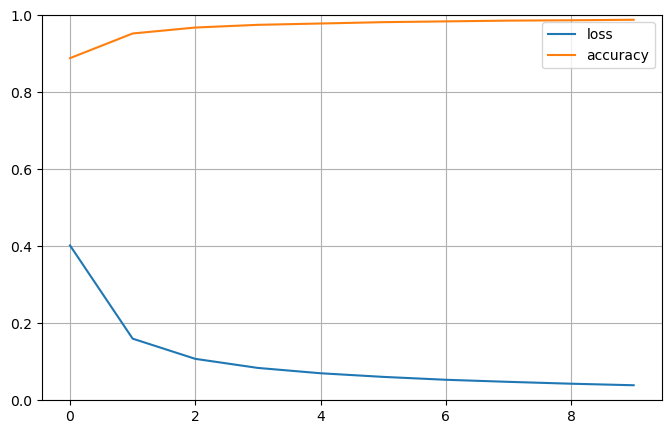

In [10]:
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [12]:
lenet.save('lenetmodel.h5')
print("model saved")

model saved
